<div style ="border-width:6px;
             border-radius:10px;
             border-style: solid;
             border-color:#269bda;
             background-color: #269bda;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Regression Challenge: Predicting Market Costs </h1>
</div>

<table align="left">
  <td>
    <a
       href="https://colab.research.google.com/github/AyaHazem61/IEEE-ManSB-VICTORIS-2.0-Data-Science-Competition/blob/master/IEEE-ManSB-VICTORIS-2.0-Filtration/regression-challenge-predicting-market-cost.ipynb" 
       target="_parent">
       <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
    </a>
  </td>
    
  <td>
    <a 
       target="_blank" 
       href="https://www.kaggle.com/code/ayahazem6103/regression-challenge-predicting-market-cost/" >
        <img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt = "Open In Kaggle"/>
    </a>
  </td>
</table>


<br>


<center>
    <a>
        <img src="https://www.tastingtable.com/img/gallery/13-most-affordable-grocery-stores-in-2023/intro-1679073677.webp"
             border="0" 
             width=800 
             height=600 
             class="center">
    </a>


<div style ="border-width:6px;
             border-radius:10px;
             border-style: solid;
             border-color:#269bda;
             background-color: #269bda;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Task </h1>
</div>



Welcome to the Regression Challenge: Predicting Market Costs! This competition tasks you with building advanced regression models to accurately predict the costs of products within a diverse market landscape.

### Features in test data
- **Person Description** - Description of the person visiting the market
- **Place Code** - Code for each place which consists of 2 city codes parts separated by "_"
- **Customer Order** - Order of each customer in the market
- **Additional Features in market** - A list of features that are found in the market
- **Promotion Name** - Made by the market on media
- **Store Kind** - A genre for the store
- **Store Cost** - Cost of the Store
- **Store Sales** - The amount of money spent on sales that have been made since the store first opened.
- **Gross Weight** - Bought item weight
- **Net Weight** - Bought item weight without the package
- **Package Weight** - Weight of the Package
- **Is Recyclable?** - If the item is Recyclable or no
- **Yearly Income** - min. Income for the consumer per year
- **Store Area** - Area of the store
- **Grocery Area** - Area of grocery department in the store
- **Frozen Area** - Area of frozen food department in the store
- **Meat Area** - Area of Meat department in the store
- **Cost** - The target variable


# Table of Contents
* [Preprocessing and Merging the Training Batchs](#1)
* [Cleaning Dataset](#3)
* [Exploring and Visualizing Dataset](#2)
* [Preprocessing Pipelines](#4)
* [Chosing the best Model](#5)
* [Chosing Hyperparameters](#6)


<a id="1"></a>

<div style ="border-width:6px;
             border-radius:10px;
             border-style: solid;
             border-color:#269bda;
             background-color: #269bda;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Preprocessing and Merging the Training Batchs</h1>
</div>

In [1]:
import os

p_dir = './data/ieee-mansb-victoris-2/'
for dirname, _, filenames in os.walk(p_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/ieee-mansb-victoris-2/sample_submission.csv
./data/ieee-mansb-victoris-2/test.csv
./data/ieee-mansb-victoris-2/IEEE_Victoris2_Filtration_train_data\Train_Batch_1.csv
./data/ieee-mansb-victoris-2/IEEE_Victoris2_Filtration_train_data\Train_Batch_2.csv
./data/ieee-mansb-victoris-2/IEEE_Victoris2_Filtration_train_data\Train_Batch_3.csv


In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

train_path = p_dir + 'IEEE_Victoris2_Filtration_train_data/'
train_batch1 = pd.read_csv(train_path + 'Train_Batch_1.csv')

print(train_batch1.shape)
print('\n___________\n')
print(train_batch1.columns)
print('\n___________\n')
train_batch1.head(2)

(19440, 17)

___________

Index(['Unnamed: 0', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Product Weights Data in (KG)',
       'Is Recyclable?', 'Min. Yearly Income', 'Store Area', 'Grocery Area',
       'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')

___________



,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,481.98,323,602.7575
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650


In [3]:
train_batch2 = pd.read_csv(train_path + 'Train_Batch_2.csv')
print(train_batch2.shape)
print('\n___________\n')
print(train_batch2.columns)
print('\n___________\n')
train_batch2.head(2)

(12956, 18)

___________

Index(['Unnamed: 0', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
       'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area',
       'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')

___________



,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,19.0421,yes,30K+,2577.50,1734.50,503.07,335.38,287.1270
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,16.1349,yes,30K+,3145.51,2057.74,654.13,NaN,779.6884


In [4]:
train_batch3 = pd.read_csv(train_path + 'Train_Batch_3.csv')
print(train_batch3.shape)
print('\n___________\n')
print(train_batch3.columns)
print('\n___________\n')
train_batch3.head(2)

(6466, 19)

___________

Index(['Unnamed: 0', 'Person%20Description', 'Place%20Code',
       'Customer%20Order', 'Additional%20Features%20in%20market',
       'Promotion%20Name', 'Store%20Kind', 'Store%20Sales', 'Store%20Cost',
       'Gross%20Weight', 'Net%20Weight', 'Weights%20Data', 'Is%20Recyclable?',
       'Yearly%20Income', 'Store%20Area', 'Grocery%20Area', 'Frozen%20Area',
       'Meat%20Area', 'Cost'],
      dtype='object')

___________



,Unnamed: 0,Person%20Description,Place%20Code,Customer%20Order,Additional%20Features%20in%20market,Promotion%20Name,Store%20Kind,Store%20Sales,Store%20Cost,Gross%20Weight,Net%20Weight,Weights%20Data,Is%20Recyclable?,Yearly%20Income,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Cost
0,mc_ID_0,"Single Female with two children, education: pa...",T02ma_WA,"Meat from Deli department, Ordered Brand : Red...","['Coffee Bar', 'Florist', 'Ready Food', 'Bar F...",Sale : Double Down,Deluxe,7.12 Millions,2.5632 Millions,23.2575,20.3503,"{'Gross Weight': 23.2575, 'Net Weight': 20.350...",yes,90K+,3145.51,2056.79,654.13,436.09,500.7202
1,mc_ID_1,"Single Female with five children, education: p...",M10da_YU,"Specialty from Produce department, Ordered Bra...","['Coffee Bar', 'Florist', 'Bar For Salad', 'Vi...",GLD,Deluxe,14.72 Millions,7.0656 Millions,16.7163,12.3555,"{'Gross Weight': 16.7163, 'Net Weight': 12.355...",yes,30K+,2856.68,1871.16,595.93,395.51,484.1411


In [5]:
def concat_batchs(batch1, batch2, batch3):
    #extracting Gross, Net, Package Weight from Product Weights in batch1
    col = 'Product Weights Data in (KG)'
    batch1['Gross Weight']  = batch1[col].str.extract(r"'Gross Weight': ([\d.]+)")
    batch1['Net Weight'] = batch1[col].str.extract(r"'Net Weight': ([\d.]+)")
    batch1['Package Weight'] = batch1[col].str.extract(r"'Package Weight': ([\d.]+)")
    batch1.drop(col, axis = 1, inplace = True)
    
    #identifier for batch1
    batch1['Unnamed: 0'] = 1
    
    # renaming and ordering columns in batch1
    columns = ['Unnamed: 0', 'Person Description', 'Place Code', 'Customer Order',
               'Additional Features in market', 'Promotion Name', 'Store Kind',
               'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
               'Package Weight', 'Is Recyclable?', 'Yearly Income',
               'Store Area', 'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost']
    
    batch1.rename({"Min. Yearly Income" : "Yearly Income"}, axis = 1, inplace = True)
    batch1 = batch1[columns]
    
    
    #creating Package Weight column in batch2
    batch2['Package Weight'] = batch2['Gross Weight'] - batch2['Net Weight']
    
    #renaming and ordering columns in batch2
    batch2.rename({"Min. Person Yearly Income" : "Yearly Income"}, axis = 1, inplace = True)
    batch2 = batch2[columns]
    
    #identifier for batch2
    batch2['Unnamed: 0'] = 2
    
    
    #extracting Gross, Net, Package Weight from Product Weights in batch1
    batch3['Gross%20Weight']  = batch3['Weights%20Data'].str.extract(r"'Gross Weight': ([\d.]+)")
    batch3['Net%20Weight'] = batch3['Weights%20Data'].str.extract(r"'Net Weight': ([\d.]+)")
    batch3['Weights%20Data'] = batch3['Weights%20Data'].str.extract(r"'Package Weight': ([\d.]+)")
    batch3['Unnamed: 0'] = 3
    
    #renaming and sorting columns in batch3
    renames = {batch3.columns.values[i] : columns[i] for i in range(len(columns))}
    batch3.rename(renames, axis = 1, inplace = True)
    
    
    #asserting that all batchs have same columns
    assert batch1.shape[1] ==  batch2.shape[1] ==  batch3.shape[1]
    assert (batch1.columns.values.all() == batch2.columns.values.all() == batch3.columns.values.all())
    
    #merging batchs
    dataset = pd.concat([batch1, batch2,  batch3], axis = 0)
    
    #asserting successfull merging
    assert dataset.shape[1] == len(columns)
    assert dataset.shape[0] == (batch1.shape[0] + batch2.shape[0] + batch3.shape[0])
    assert (dataset.isna().sum().sum() 
                - ( batch1.isna().sum().sum() + batch2.isna().sum().sum() + batch3.isna().sum().sum() )) == 0
    
    #droping rows with missing cost
    dataset.dropna(subset = ['Cost'], inplace = True)
    
    #shuffling and resetting index
    return dataset.sample(frac = 1, random_state = 42).reset_index(drop = True)

In [6]:
df = concat_batchs(train_batch1.copy(), train_batch2.copy(), train_batch3.copy())

print(df.shape)
print('\n___________\n')
print(df.columns)
print('\n___________\n')
df.head()

(38831, 19)

___________

Index(['Unnamed: 0', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
       'Package Weight', 'Is Recyclable?', 'Yearly Income', 'Store Area',
       'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')

___________



,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,1,"Married Female with one child, education: part...",B14on_WA,"Vegetables from Frozen Foods department, Order...","['Ready Food', 'Bar For Salad']",Price Cutters,Supermarket,2.76 Millions,1.2144 Millions,27.4729,22.9668,4.5061,recyclable,50K+,3687.88,NaN,853.22,NaN,761.0696
1,2,"Married Female with No children, education: ba...",T02ma_WA,"Vegetables from Produce department, Ordered Br...","['Coffee Bar', 'Bar For Salad', 'Florist', 'Re...",Sale : Double Down,Deluxe,8.25 M,3.465 M,28.6358,27.1822,1.4536,no,50K+,NaN,2055.29,654.13,NaN,500.7202
2,2,"Single Male with two children, education: part...",P07nd_OR,"Vegetables from Produce department, Ordered Br...",[],NaN,Supermarket,2.28 M,0.9348 M,NaN,18.606,NaN,yes,10K+,1890.01,1508.0,NaN,151.9,660.2352
3,1,"Married Female with four children, education: ...",B06ls_CA,"Snack Foods from Snack Foods department, Order...","['Ready Food', 'Coffee Bar', 'Florist', 'Video...",Fantastic Discounts,Gourmet,1.53 Millions,0.7497 Millions,17.8792,16.4256,1.4536,recyclable,130K+,2199.78,NaN,465.54,310.66,718.9158
4,1,"Single Female with three children, education: ...",O09ba_VE,"Vegetables from Frozen Foods department, Order...","['Bar For Salad', 'Ready Food']",Savings Galore,Supermarket,7.56 Millions,3.1752 Millions,24.8564,21.9493,2.9072,non recyclable,10K+,NaN,NaN,470.27,313.65,550.1437


<a id = "3"> </a>
<div style ="border-width:6px;
             border-radius:10px;
             border-style: solid;
             border-color:#269bda;
             background-color: #269bda;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Cleaning Dataset</h1>
</div>

In [7]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(df, test_size = 0.2, random_state = 42)
train = train.reset_index(drop = True)
val = val.reset_index(drop = True)

X_train, X_val, y_train, y_val = train.drop('Cost', axis = 1), val.drop('Cost', axis = 1), train['Cost'], val['Cost']

In [8]:
cols_rename = ['batch_num', 'person_description', 'place_code', 'customer_order',
               'additional_features', 'promotion_name', 'store_kind',
               'store_sales', 'store_cost', 'gross_weight', 'net_weight',
               'package_weight', 'recyclable', 'yearly_income', 'store_area',
               'grocery_area', 'frozen_area', 'meat_area']

promotion_name_encoding = {'Roller Savings (High) ': 0,  'One Day Sale': 1,
                             'Sale Winners': 2, 'Wallet Savers': 3,
                             'Budget Bargains': 4, 'Bag Stuffer': 5,
                             'Pick Your Savings': 6, 'Two for One': 7,
                             'Price Slashers': 8, 'Save It (Sale)': 9,
                             'Sale : Double Down': 10, 'Lottery Cash Registerion': 11,
                             'Savings Galore': 12, 'Best Price Savers': 13,
                             'Sale Sale Sale': 14, 'You Save Days': 15,
                             'Tip Top Savings': 16, 'Shelf Clearing Days': 17,
                             'Go For It': 18, 'Discount Frenzy': 19,
                             'Saving Days': 20, 'Super Savers': 21,
                             'Three for One': 22, 'Sales Days': 23,
                             'Price Smashers': 24, 'GLD': 25,
                             'Best Savings': 26, 'Dimes Off': 27, 'Shelf Emptiers': 28,
                             'Super Wallet Savers': 29, 'Big Time Discounts': 30,
                             'Money Savers': 31, 'Weekend Discount': 32,
                             'Super Duper Savers': 33, 'Price Destroyers': 34,
                             'Price Winners': 35, 'Save Price': 36,
                             'Two Day Sale': 37, 'Fantastic Discounts': 38,
                             'Price Cutters': 39, 'I Cant Believe It Sale': 40,
                             'Green Light Special': 41, 'Full Free': 42,
                             'Mystery Sale': 43, 'Big Time Saving': 44,
                             'Dollar Days': 45, 'Promo Big': 46,
                             'Double Your Savings': 47, 'Coupon Spectacular': 48}

marital_status_encoding = {'married' : 1, 'single' : 0}
gender_encoding = {'female' : 1, 'male' : 0}
children_num_encodeing = {'no' : 0, 'one' : 1, 'two' : 2, 'three' : 3, 'four' : 4, 'five' : 5,
                          'six' : 6, 'seven':7, 'eight': 8, 'nine':9, 'ten': 10}
is_recyclable_encoding = {'recyclable' : 1, 'yes' : 1,  'non recyclable' : 0, 'no' : 0}

In [9]:
import numpy as np
import re

def string_to_list(string):
    if string is np.nan or string is None:
        return []
    lst = re.findall( r"'([^']+)'", string)
    if lst == np.nan:
        return []
    return lst


def clean_data(X_data):
    X = X_data.copy()
    X.columns = cols_rename
    
    col = 'person_description'
    X[col] = X[col].str.lower()
    X['marital_status'] = X[col].apply(lambda x : x.split()[0]).map(marital_status_encoding)
    X['gender']  = X[col].apply(lambda x : x.split()[1]).map(gender_encoding)
    X['children'] = X[col].str.extract(r"with (\w+) child").replace(children_num_encodeing)
    X['education'] = X[col].str.extract(r"education: ([\w\s]+) working")
    X['work'] = X[col].str.extract(r"working as ([\w\s]+)")
    
    X.drop(col, axis = 1, inplace = True)
    X['promotion_name'] = X['promotion_name'].map(promotion_name_encoding)
    X['additional_features'] = X['additional_features'].apply(string_to_list)
    
    cols, pattern = ['store_sales', 'store_cost'], r'(\d+\.\d+)'
    for col in cols:
        X[col] = X[col].str.extract(pattern)
        
    col, pattern = 'yearly_income', '(\d+)'
    X[col] = X[col].str.extract(pattern)
    
    X['recyclable'] = X['recyclable'].map(is_recyclable_encoding)
    
    num_cols =['batch_num', 'store_sales', 'store_cost', 'gross_weight',
               'net_weight', 'package_weight','yearly_income',
               'store_area', 'grocery_area', 'frozen_area',
               'meat_area']
    for col in num_cols:
        X[col] = pd.to_numeric(X[col], errors = 'coerce')
        
    cat_cols = ['marital_status', 'gender', 'children',
                'recyclable', 'education', 'work', 
                'place_code', 'store_kind']
    for col in cat_cols:
        X[col] = X[col].astype('category')
    
    cols_order = [ 'batch_num', 'marital_status', 'gender', 'children',
                   'education', 'work', 'place_code', 'customer_order',
                   'additional_features', 'promotion_name', 'store_kind',
                   'store_sales', 'store_cost', 'gross_weight', 'net_weight',
                   'package_weight', 'recyclable', 'yearly_income', 'store_area',
                   'grocery_area', 'frozen_area', 'meat_area']
    
    X = X[cols_order]
    
    return X

In [10]:
train_cleaned = clean_data(train.drop('Cost', axis = 1))
train_cleaned['cost'] = train['Cost']


print(train_cleaned.shape)
print('\n___________\n')
print(train_cleaned.columns)
print('\n___________\n')
train_cleaned.head()

(31064, 23)

___________

Index(['batch_num', 'marital_status', 'gender', 'children', 'education',
       'work', 'place_code', 'customer_order', 'additional_features',
       'promotion_name', 'store_kind', 'store_sales', 'store_cost',
       'gross_weight', 'net_weight', 'package_weight', 'recyclable',
       'yearly_income', 'store_area', 'grocery_area', 'frozen_area',
       'meat_area', 'cost'],
      dtype='object')

___________



,batch_num,marital_status,gender,children,education,work,place_code,customer_order,additional_features,promotion_name,store_kind,store_sales,store_cost,gross_weight,net_weight,package_weight,recyclable,yearly_income,store_area,grocery_area,frozen_area,meat_area,cost
0,1,1,1,1,high school degree,manual,S01em_OR,"Frozen Desserts from Frozen Foods department, ...","[Video Store, Bar For Salad, Coffee Bar, Flori...",0.0,Deluxe,1.53,0.6732,11.9921,10.5385,1.4536,1.0,30.0,2572.86,1734.50,503.07,335.38,440.1568
1,1,1,0,4,high school degree,skilled manual,S04ne_WA,"Fruit from Produce department, Ordered Brand :...",[],1.0,Supermarket,10.24,3.7888,21.8039,20.3503,1.4536,1.0,30.0,2811.99,2047.23,459.36,304.91,486.7561
2,2,1,0,0,partial high school,skilled manual,B14on_WA,"Bread from Baked Goods department, Ordered Bra...","[Ready Food, Bar For Salad]",0.0,Supermarket,4.50,1.9350,11.5415,7.1807,4.3608,1.0,10.0,3683.93,2263.86,853.22,568.75,356.4245
3,1,0,1,2,partial high school,skilled manual,S04ne_WA,"Snack Foods from Snack Foods department, Order...",[],1.0,Supermarket,11.05,5.3040,23.9843,21.0771,2.9072,1.0,10.0,2811.11,2049.72,457.36,305.08,486.7561
4,3,1,0,2,high school degree,manual,V13er_BC,"Hygiene from Health and Hygiene department, Or...","[Florist, Bar For Salad, Video Store, Coffee B...",NaN,NaN,3.20,1.5040,28.7811,25.7286,3.0525,1.0,30.0,2145.74,1525.28,373.10,248.79,535.9181


<a id = "2"> </a>
<div style ="border-width:6px;
             border-radius:10px;
             border-style: solid;
             border-color:#269bda;
             background-color: #269bda;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Exploring and Visualizing Dataset</h1>
</div>

**TO DO**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

sns.set_style('darkgrid')
sns.set_palette('Blues')

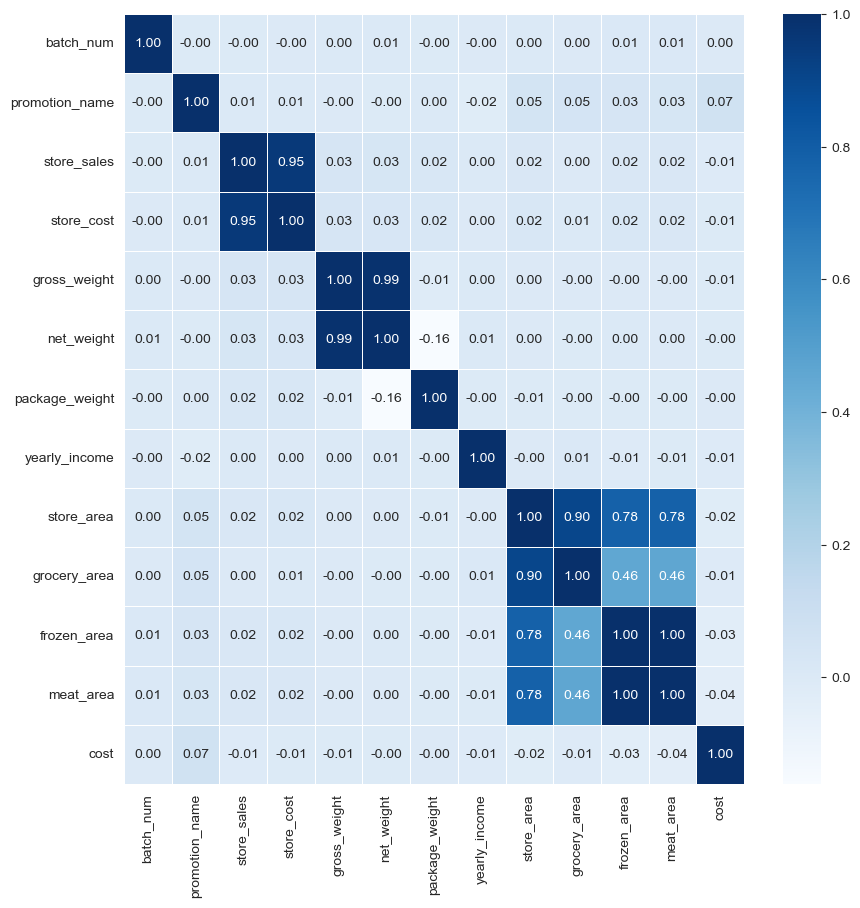

In [13]:
fig, ax = plt.subplots(figsize= (10, 10))
sns.heatmap(train_cleaned.select_dtypes(np.number).corr(),  annot=True, fmt=".2f", linewidth=.5, cmap = 'Blues')

plt.show()

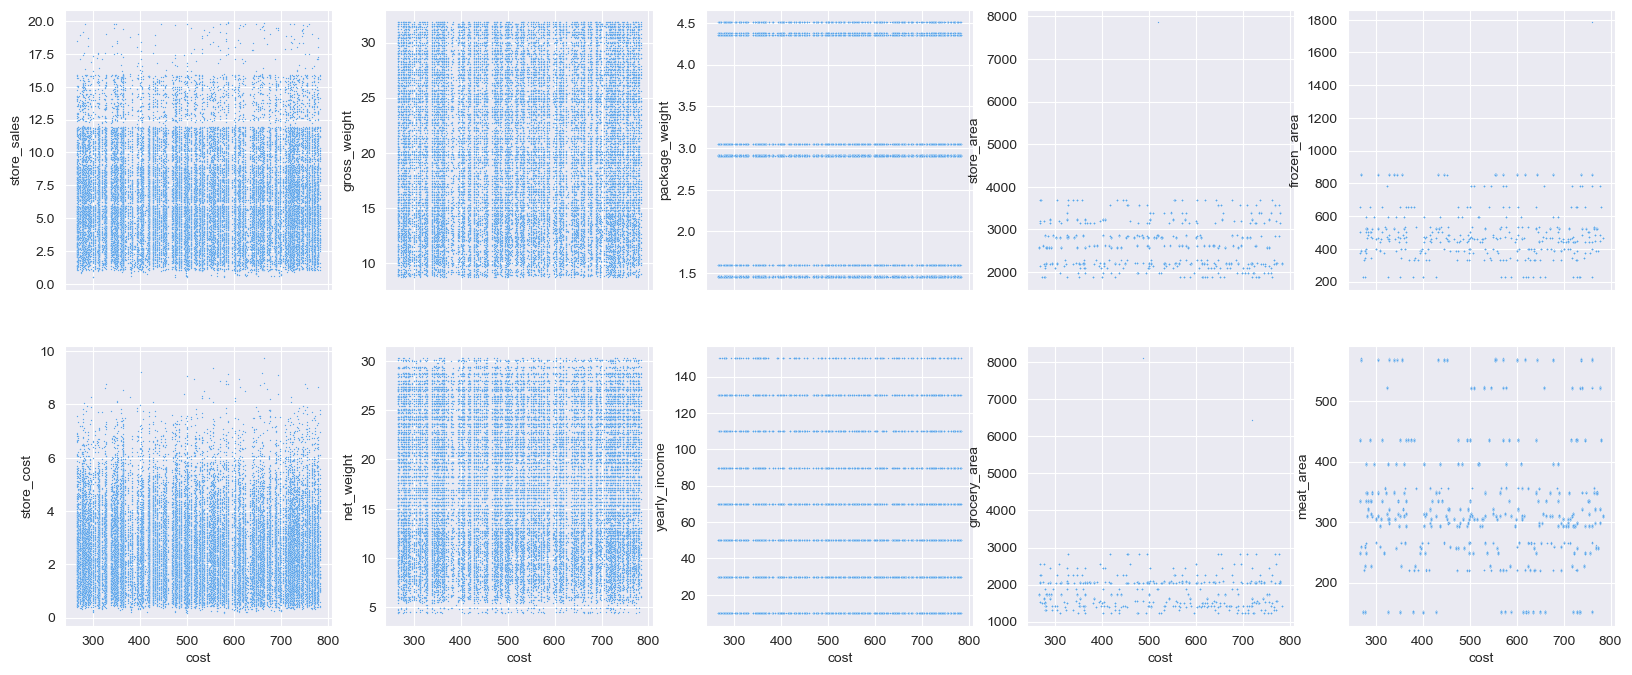

In [14]:
#complete random no relation
num_attris = ['store_sales', 'store_cost', 'gross_weight',
              'net_weight', 'package_weight', 'yearly_income',
              'store_area', 'grocery_area',  'frozen_area', 'meat_area']

fig, ax = plt.subplots(2, 5,sharex = True, figsize = (20, 8))
i, j = 0, 0
for col in num_attris:
    sns.scatterplot(x = 'cost', y = col, data = train_cleaned, ax = ax[i][j], s = 1, color='#57A2EA')
    i += 1
    if i == 2: 
        i, j = 0, j+1

plt.show()

### highly corrlated variables

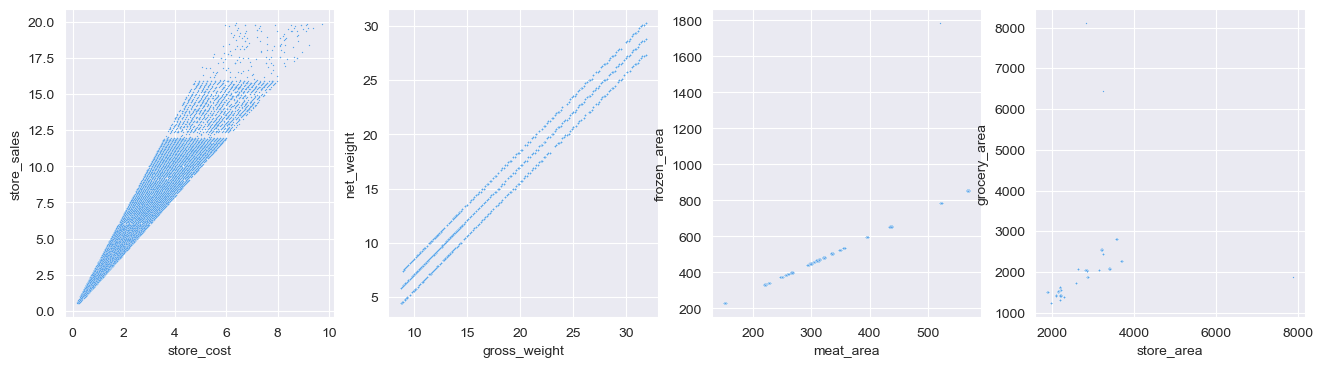

In [15]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
sns.scatterplot(x = 'store_cost', y = 'store_sales', data = train_cleaned, s = 1, color='#57A2EA',ax = ax[0])
sns.scatterplot(x = 'gross_weight', y = 'net_weight', data = train_cleaned, s = 1, color='#57A2EA', ax = ax[1])
sns.scatterplot(y = 'frozen_area', x = 'meat_area', data = train_cleaned, s = 1, color='#57A2EA', ax = ax[2])
sns.scatterplot(y = 'grocery_area', x = 'store_area', data = train_cleaned, s = 1, color='#57A2EA', ax = ax[3])

plt.show()

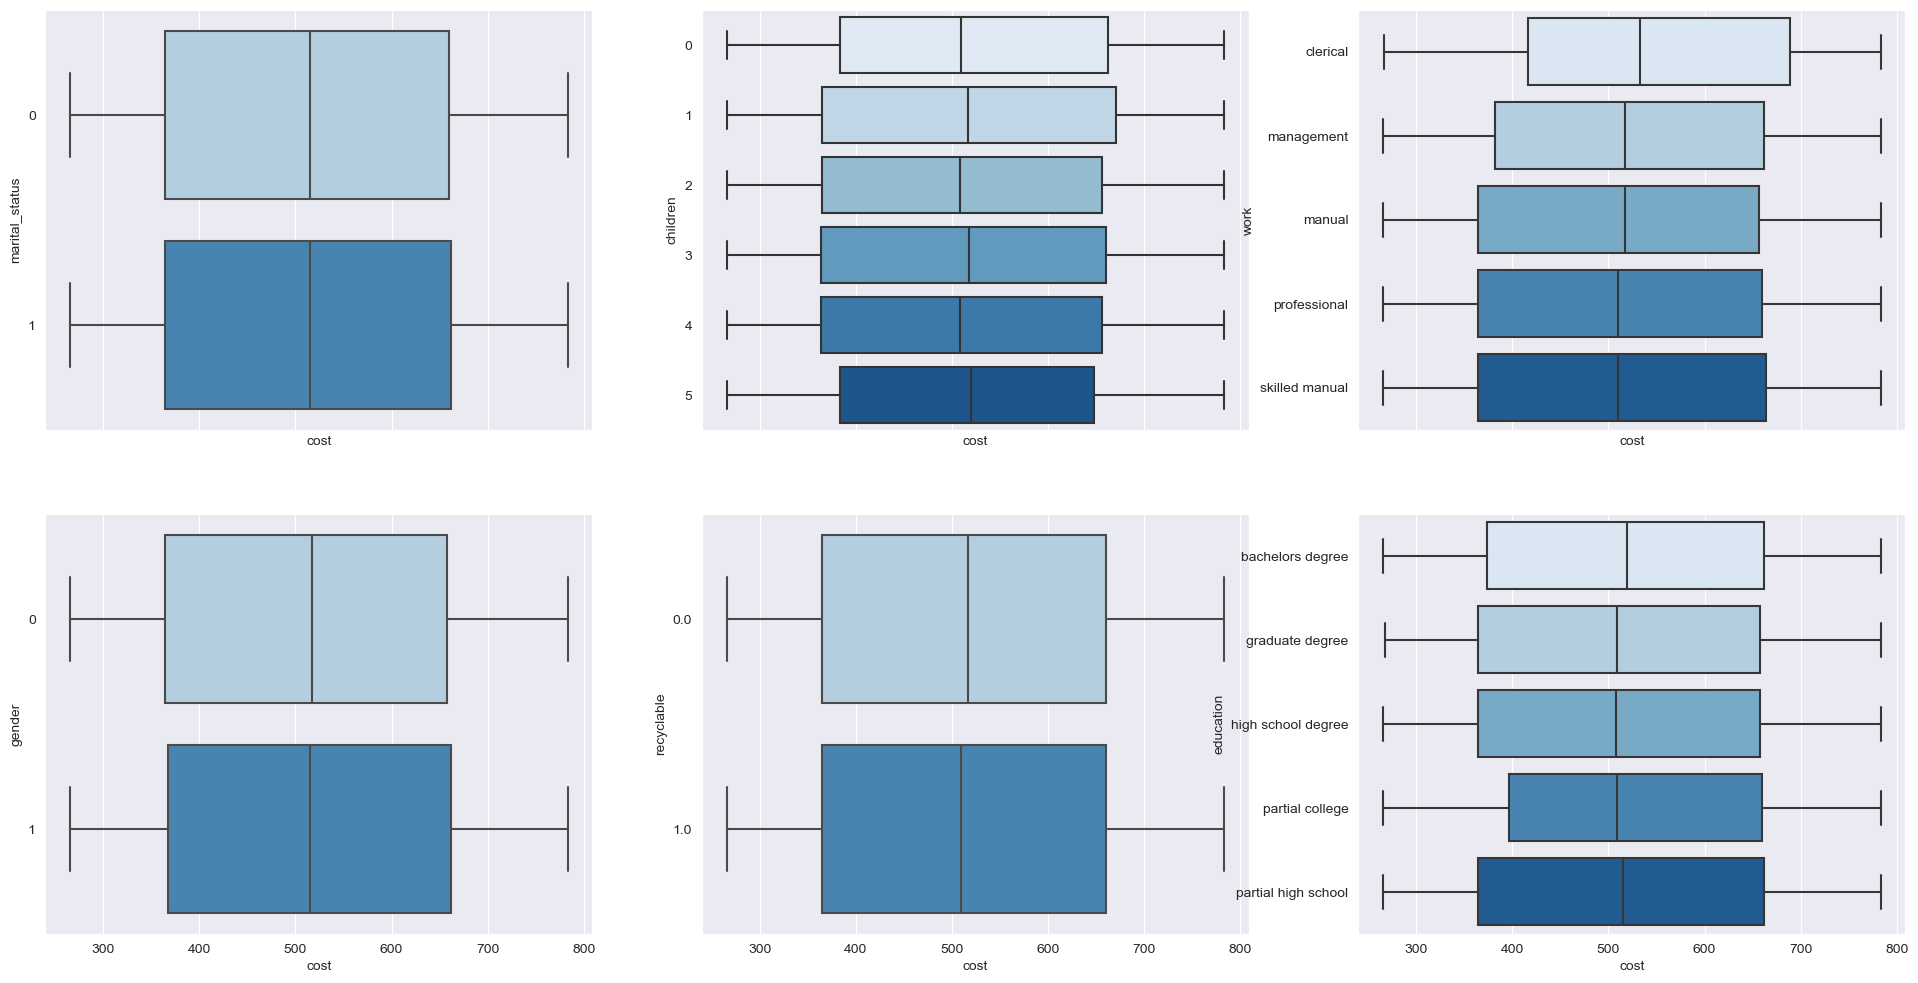

In [16]:
#almost identical distribution
cat_attris = ['marital_status', 'gender', 'children', 'recyclable', 'work', 'education']
train_cleaned[cat_attris] = train_cleaned[cat_attris].astype('category')

fig, ax = plt.subplots(2, 3, sharex = True, figsize = (24, 12))
i, j = 0, 0
for col in cat_attris:
    sns.boxplot(x = 'cost', y = col, data = train_cleaned, ax = ax[i][j], palette='Blues',)
    i += 1
    if i == 2: 
        i, j = 0, j+1
plt.show()

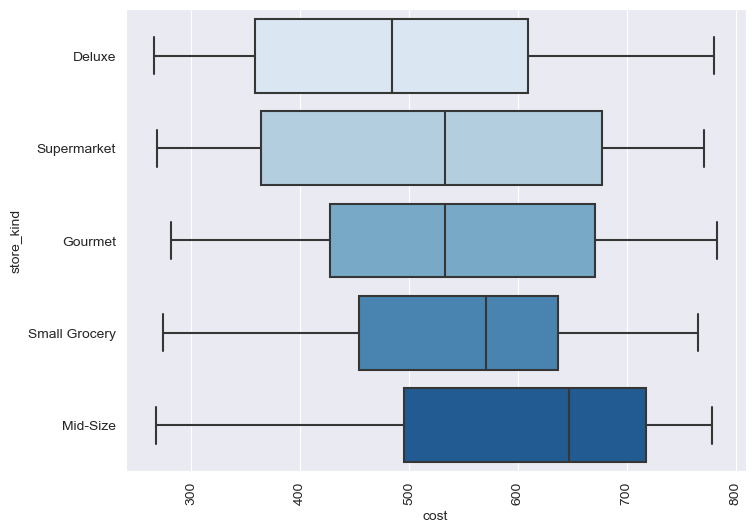

In [17]:
#variance in distribution between categories

fig, ax = plt.subplots(figsize = (8, 6))
sns.boxplot(y = 'store_kind', x = 'cost', data = train_cleaned, palette='Blues',
            order = train_cleaned.groupby('store_kind')['cost'].quantile(0.25).sort_values().index)
plt.xticks(rotation=90)
plt.show()

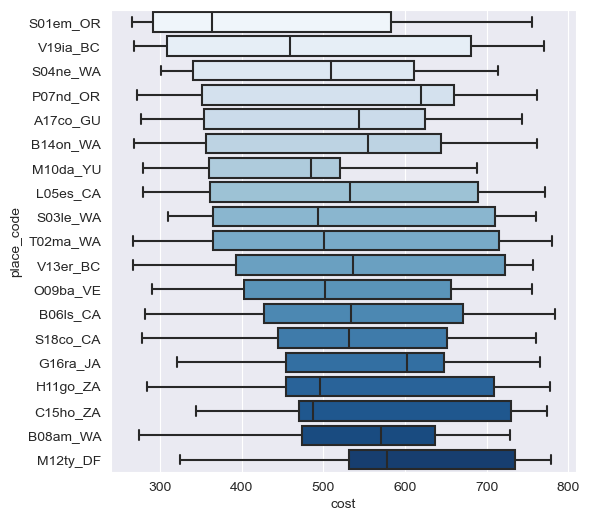

In [18]:
#variance in distribution between categories

fig, ax = plt.subplots(figsize = (6, 6))
sns.boxplot(y = 'place_code', x = 'cost', data = train_cleaned, palette='Blues',
            order = train_cleaned.groupby('place_code')['cost'].quantile(0.25).sort_values().index)
plt.show()

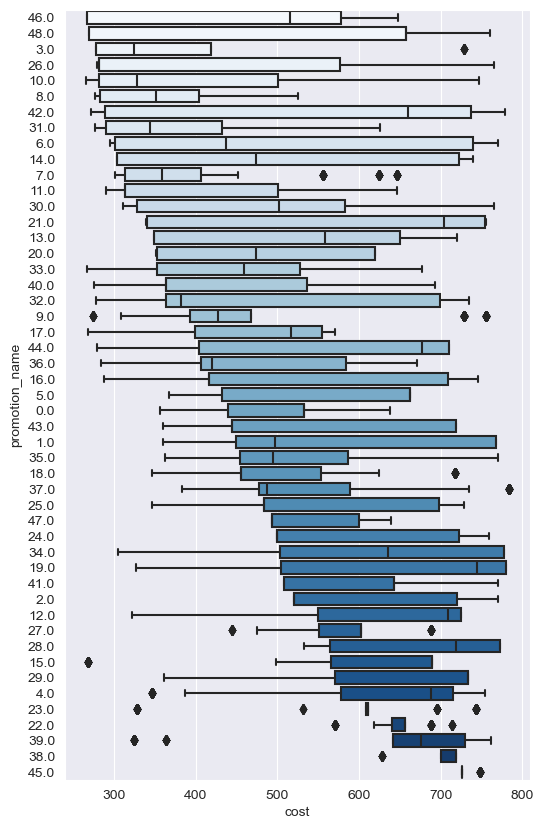

In [19]:
#variance in distribution between categories ====>>>> most important variable
fig, ax = plt.subplots(figsize = (6, 10))
sns.boxplot(y = 'promotion_name', x = 'cost', data = train_cleaned, palette='Blues', orient = 'h',
            order = train_cleaned.groupby('promotion_name')['cost'].quantile(0.25).sort_values().index)
plt.show()

In [20]:
from custom_transformers import Multi_Hot_Encoder

add_feat_encoder = Multi_Hot_Encoder('additional_features')
addfeat = pd.DataFrame(add_feat_encoder.fit_transform(train_cleaned[['additional_features']]),
                       columns = add_feat_encoder.classes__)
addfeat = addfeat.astype('category')
addfeat['cost'] = train_cleaned['cost'].reset_index(drop = True)
addfeat.head()

,Bar For Salad,Ready Food,Florist,Coffee Bar,Video Store,cost
0,1.0,1.0,1.0,1.0,1.0,440.1568
1,0.0,0.0,0.0,0.0,0.0,486.7561
2,1.0,1.0,0.0,0.0,0.0,356.4245
3,0.0,0.0,0.0,0.0,0.0,486.7561
4,1.0,1.0,1.0,1.0,1.0,535.9181


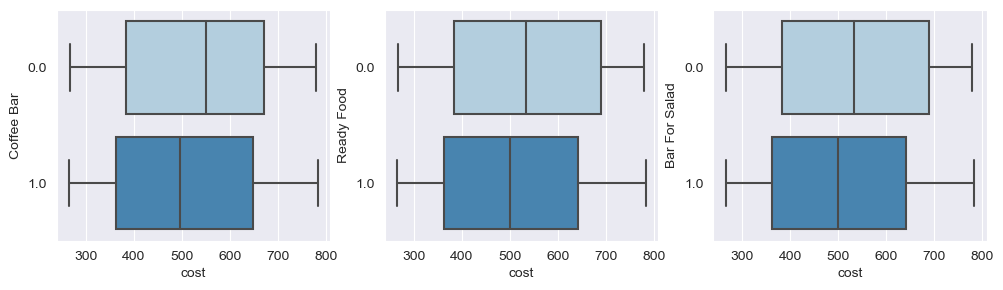

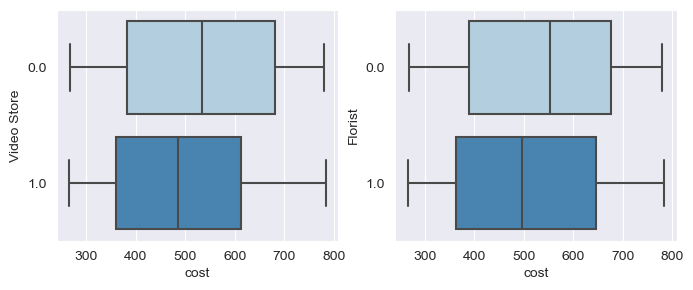

In [21]:
# slight difference in distribution
fig, ax = plt.subplots(1, 3, sharex = True,figsize = (12, 3))
sns.boxplot(y = 'Coffee Bar', x = 'cost', data = addfeat, ax = ax[0], palette='Blues')
sns.boxplot(y = 'Ready Food', x = 'cost', data = addfeat, ax = ax[1], palette='Blues')
sns.boxplot(y = 'Bar For Salad', x = 'cost', data = addfeat, ax = ax[2], palette='Blues')
plt.show()

fig, ax = plt.subplots(1, 2, sharex = True,figsize = (8, 3))
sns.boxplot(y = 'Video Store', x = 'cost', data = addfeat, ax = ax[0], palette='Blues')
sns.boxplot(y = 'Florist', x = 'cost', data = addfeat, ax = ax[1], palette='Blues')
plt.show()


<a id = "4"> </a>
<div style ="border-width:6px;
             border-radius:10px;
             border-style: solid;
             border-color:#269bda;
             background-color: #269bda;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Preprocessing Pipelines</h1>
</div>

<a id="4.1"> </a>


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from custom_transformers import Target_Encoder

cols =   [ 'batch_num', 'marital_status', 'gender', 'children',
           'education', 'work', 'place_code', 'customer_order',
           'additional_features', 'promotion_name', 'store_kind',
           'store_sales', 'store_cost', 'gross_weight', 'net_weight',
           'package_weight', 'recyclable', 'yearly_income', 'store_area',
           'grocery_area', 'frozen_area', 'meat_area']



In [23]:
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
special_num_pipeline=Pipeline([
    ('impute', KNNImputer(n_neighbors=6)),
    ('power_transformer',PowerTransformer()),
    ('scale',StandardScaler()) ])

num_pipeline=Pipeline([
    ('impute', KNNImputer(n_neighbors=6)),
    ('scale',StandardScaler()) ])

basic_pipeline=Pipeline([
    ('impute', KNNImputer(n_neighbors=6)), ])

cat_pipeline=Pipeline([
    ('Imputer',SimpleImputer(strategy='most_frequent')),
    ('HotEncoder',OneHotEncoder()) ])

promotion_pipeline = Pipeline([
                           ('target_encode', Target_Encoder('promotion_name')),
                           ('Imputer',SimpleImputer(strategy='mean')),
                           ('scale', StandardScaler()),
                           ])

place_code_pipeline = Pipeline([
                           ('target_encode', Target_Encoder('place_code')),
                           ('Imputer',SimpleImputer(strategy='mean')),
                           ('scale', StandardScaler()),
                           ])

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

preprocessing = ColumnTransformer([
      ('place_code_pipeline', place_code_pipeline, ['place_code']),
    
      ('promotion_pipeline', promotion_pipeline, ['promotion_name']),
    
     ('spec_num_pipeline',special_num_pipeline,['store_cost', 'yearly_income']),

     ('num_pipeline',num_pipeline,['store_sales', 'store_area','gross_weight', 'children']),

     ('basic_num_pipeline',basic_pipeline,['recyclable','gender','marital_status']),

     ('cat_pipeline',cat_pipeline,['education', 'work']),
    
     ('addfeats_pipeline', Multi_Hot_Encoder('additional_features'), ['additional_features'])
                                ],
    remainder = "drop")

full_pipeline = Pipeline([('clean', FunctionTransformer(clean_data)),
                          ('preprocess', preprocessing)])

full_pipeline

Pipeline(steps=[('clean',
                 FunctionTransformer(func=<function clean_data at 0x00000264FBDF4CC0>)),
                ('preprocess',
                 ColumnTransformer(transformers=[('place_code_pipeline',
                                                  Pipeline(steps=[('target_encode',
                                                                   Target_Encoder(col='place_code')),
                                                                  ('Imputer',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['place_code']),
                                                 ('promotion_pipeline',
                                                  Pipeline(steps=[('target_e...
                                                 ('basic_num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer(n_neighbors=6))]),
                                                  ['recyclable', 'gender',
                                                   'marital_status']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('HotEncoder',
                                                                   OneHotEncoder())]),
                                                  ['education', 'work']),
                                                 ('addfeats_pipeline',
                                                  Multi_Hot_Encoder(col='additional_features'),
                                                  ['additional_features'])]))])

In [25]:
X_train_processed = full_pipeline.fit_transform(X_train, y_train)
X_train_processed

array([[-2.27481534, -0.2549415 , -1.70850704, ...,  1.        ,
         1.        ,  1.        ],
       [-0.58152556,  0.80107174,  0.89943971, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.04194571, -0.2549415 , -0.33037175, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.05160875, -0.60579192, -0.22147203, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.05160875,  0.0243217 ,  1.79794755, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.206206  , -1.55595277,  0.74929915, ...,  1.        ,
         0.        ,  0.        ]])

In [26]:
X_val_processed = full_pipeline.transform(X_val)
X_val_processed

array([[ 1.005911  , -0.57958735, -0.25011916, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.52550194,  0.        ,  1.44281556, ...,  0.        ,
         1.        ,  0.        ],
       [-1.42431814,  0.        , -0.70793049, ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [ 0.77059817, -0.60579192,  0.90050041, ...,  1.        ,
         1.        ,  1.        ],
       [ 1.005911  , -0.40811315,  1.09064496, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.63975487, -1.07957194, -0.65502564, ...,  0.        ,
         1.        ,  0.        ]])

<a id = "5"> </a>
<div style ="border-width:6px;
             border-radius:10px;
             border-style: solid;
             border-color:#269bda;
             background-color: #269bda;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Chosing the best Model</h1>
</div>

In [31]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet,  BayesianRidge
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from catboost import CatBoostRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

regressors = {
    #linear models
    'LinearRegression':LinearRegression(),
    'SGDRegressor':SGDRegressor(),
    'ElasticNet':ElasticNet(),
    'BayesianRidge':BayesianRidge(),
    
    #support-vector-machine
    'SVR':SVR(),
        
    #tree-based models
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'ExtraTreeRegressor': ExtraTreeRegressor(),
    
    #ensemble models
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'ExtraTreesRegressor': ExtraTreesRegressor(),
    'CatBoostRegressor':CatBoostRegressor(verbose=False),
    'XGBRegressor': XGBRegressor(),
    'LGBMRegressor':LGBMRegressor(verbose=0),
}

val_rmses = dict()
for rgr in regressors.keys():
    print(f'Training {rgr} model now')
    regressors[rgr] = regressors[rgr].fit(X_train_processed, y_train)
    y_val_pred = regressors[rgr].predict(X_val_processed)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    print(f'{rgr} mean square error on validation set = {val_rmse}')
    val_rmses[rgr] = val_rmse
    print('\n__________________\n')

Training LinearRegression model now
LinearRegression mean square error on validation set = 137.4516780747711

__________________

Training SGDRegressor model now
SGDRegressor mean square error on validation set = 137.77305608818054

__________________

Training ElasticNet model now
ElasticNet mean square error on validation set = 139.39263527632082

__________________

Training BayesianRidge model now
BayesianRidge mean square error on validation set = 137.44462004770213

__________________

Training SVR model now
SVR mean square error on validation set = 137.58712763765965

__________________

Training DecisionTreeRegressor model now
DecisionTreeRegressor mean square error on validation set = 105.54063375636417

__________________

Training ExtraTreeRegressor model now
ExtraTreeRegressor mean square error on validation set = 98.23630857228898

__________________

Training GradientBoostingRegressor model now
GradientBoostingRegressor mean square error on validation set = 120.7706663007

In [35]:
pd.Series(val_rmses).sort_values()

ExtraTreesRegressor           72.456002
RandomForestRegressor         75.733467
XGBRegressor                  78.761924
CatBoostRegressor             80.162720
LGBMRegressor                 85.504268
ExtraTreeRegressor            98.236309
DecisionTreeRegressor        105.540634
GradientBoostingRegressor    120.770666
BayesianRidge                137.444620
LinearRegression             137.451678
SVR                          137.587128
SGDRegressor                 137.773056
ElasticNet                   139.392635
dtype: float64

In [32]:
from sklearn.ensemble import VotingRegressor

voting_rgr = VotingRegressor(estimators=[
                    ('rf', RandomForestRegressor(random_state = 42)),
                    ('et', ExtraTreesRegressor(random_state = 42)),
                    ('xgb', XGBRegressor(random_state = 42) ),
                    
                ])
voting_rgr

VotingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                            ('et', ExtraTreesRegressor(random_state=42)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          g...ow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...))])

In [36]:
voting_rgr.fit(X_train_processed, y_train)
y_val_pred = voting_rgr.predict(X_val_processed)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

In [37]:
val_rmse

72.48814994767933

In [39]:
test_path = './data/ieee-mansb-victoris-2/test.csv'

X_test = pd.read_csv(test_path)
X_test_processed = full_pipeline.transform(X_test)
X_test_processed

array([[ 0.30438273,  2.44376675,  1.3454795 , ...,  1.        ,
         1.        ,  1.        ],
       [-2.27481534,  0.50022714, -1.71372122, ...,  1.        ,
         1.        ,  1.        ],
       [ 0.77059817,  0.02894521, -1.49984765, ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [ 1.09674976, -1.55595277, -1.60113531, ...,  0.        ,
         1.        ,  0.        ],
       [-2.27481534,  0.50022714, -1.0848308 , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.05160875, -0.85980307, -0.57122754, ...,  1.        ,
         1.        ,  0.        ]])

In [40]:
y_test_pred = voting_rgr.predict(X_test_processed)
y_test_pred

array([719.23478057, 595.30747998, 708.58233241, ..., 707.59757584,
       614.42780166, 409.02932435])

In [45]:
submission_path = "./data/ieee-mansb-victoris-2/sample_submission.csv"

submission = pd.read_csv(submission_path)
submission['Cost'] = y_test_pred
submission.to_csv('./data/subs/submission.csv', index = False)

<a id = "5"> </a>
<div style ="border-width:6px;
             border-radius:10px;
             border-style: solid;
             border-color:#269bda;
             background-color: #269bda;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Chosing Hyperparameters</h1>
</div>

**to be continued**